# Importing Dependenices

In [1]:
### Credit: https://www.kaggle.com/code/thomasmann111111/spotify-eda-autoviz

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
np.set_printoptions(linewidth=95, edgeitems=5)
sns.set_theme(style = 'white', palette = 'colorblind')
pal = sns.color_palette('colorblind')
import plotly.express as px
import time
pd.set_option('display.max_rows', 100)
from scipy.stats import shapiro
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
import re

# Reading Data

In [2]:
df = pd.read_csv('/kaggle/input/spotify-tracks-genre-dataset/train.csv')

In [3]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.drop(["Unnamed: 0", "track_id"], axis = 1, inplace=True)
df

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0          acoustic  
1          acoustic  
2          acoustic  
3          acoustic  
4          acoustic  
...             ...  
113995  world-music  
11

## Null values

**We can see that there are 3 columns artists, album_name, and track_name which has 1 null values each.**

**We will be removing that null values.**

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

We can that there no null values in the dataset now.

In [9]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

# Plotting

In [10]:
def plot_histogram(data, x, y=None):
    """
    Plot a histogram with random colors using Plotly.

    Parameters:
    - data: DataFrame
    - x: str, column name for the x-axis
    - y: str, optional, column name for the y-axis (default is None)
    """
    # Check if y is provided for a 2D histogram
    if y:
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, y=y, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'2D Histogram of {x} and {y}', xaxis_title=x, yaxis_title=y, bargap=0.2)
    else:
        # Plot a 1D histogram with random colors
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'Histogram of {x}', xaxis_title=x, bargap=0.2)

    fig.show()


In [11]:
plot_histogram(df, x='liveness')

### We can see that major tracks have liveness between 0 and 0.2

In [12]:
plot_histogram(df, 'danceability')

### We can see that most of the songs have a daceablity value between 0.48 - 0.71

Which means that most of the songs are the type of songs you can dance to!

In [13]:
plot_histogram(df, 'energy')

### Most of the songs have great engery

In [14]:
plot_histogram(df, 'loudness')

### There are 1663 songs with loudness between -5.6 and -5.7

In [15]:
plot_histogram(df, 'acousticness')

### There are almost 20 thousand songs with acousticness between -0.005 and 0.00499

In [16]:
plot_histogram(df, 'valence')

In [17]:
plot_histogram(df, 'tempo')

In [18]:
# Convert duration from milliseconds to minutes and seconds
df['duration_minutes'] = df['duration_ms'] // 60000  # 1 minute = 60,000 milliseconds
df['duration_seconds'] = (df['duration_ms'] % 60000) // 1000  # 1 second = 1,000 milliseconds

# Combine minutes and seconds into a single column with a formatted string
df['duration_formatted'] = df.apply(lambda row: f"{row['duration_minutes']}m {row['duration_seconds']}s", axis=1)

/tmp/ipykernel_19/2042893881.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19/2042893881.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19/2042893881.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
plot_histogram(df, 'duration_formatted')

Are carefully zooming into this we can see that there are 846 songs with duration of 3 minutes and 32 seconds

# Using AutoViz to visualize more


credit: https://www.kaggle.com/code/thomasmann111111/spotify-eda-autoviz

In [20]:
### Credit: https://www.kaggle.com/code/thomasmann111111/spotify-eda-autoviz

na_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])

desc = pd.DataFrame(index = list(df))
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T.drop('count', axis = 1)], axis = 1)
desc

count  nunique    %unique  null Percentage_missing  \
artists             113999    31437  27.576558     0                NaN   
album_name          113999    46589  40.867902     0                NaN   
track_name          113999    73608  64.568987     0                NaN   
popularity          113999      101   0.088597     0                NaN   
duration_ms         113999    50696  44.470566     0                NaN   
explicit            113999        2   0.001754     0                NaN   
danceability        113999     1174   1.029834     0                NaN   
energy              113999     2083   1.827209     0                NaN   
key                 113999       12   0.010526     0                NaN   
loudness            113999    19480  17.087869     0                NaN   
mode                113999        2   0.001754     0                NaN   
speechiness         113999     1489   1.306152     0                NaN   
acousticness        113999     5061   4.439513     0                NaN   
instrumentalness    113999     5346   4.689515     0                NaN   
liveness            113999     1722   1.510540     0                NaN   
valence             113999     1790   1.570189     0                NaN   
tempo               113999    45652  40.045965     0                NaN   
time_signature      113999        5   0.004386     0                NaN   
track_genre         113999      114   0.100001     0                NaN   
duration_minutes    113999       53   0.046492     0                NaN   
duration_seconds    113999       60   0.052632     0                NaN   
duration_formatted  113999      906   0.794744     0                NaN   

                       type           mean            std       min  \
artists              object            NaN            NaN       NaN   
album_name           object            NaN            NaN       NaN   
track_name           object            NaN            NaN       NaN   
popularity            int64      33.238827      22.304959     0.000   
duration_ms           int64  228031.153387  107296.057716  8586.000   
explicit               bool            NaN            NaN       NaN   
danceability        float64       0.566801       0.173543     0.000   
energy              float64       0.641383       0.251530     0.000   
key                   int64       5.309126       3.559999     0.000   
loudness            float64      -8.258950       5.029357   -49.531   
mode                  int64       0.637558       0.480708     0.000   
speechiness         float64       0.084652       0.105733     0.000   
acousticness        float64       0.314907       0.332522     0.000   
instrumentalness    float64       0.156051       0.309556     0.000   
liveness            float64       0.213554       0.190378     0.000   
valence             float64       0.474066       0.259261     0.000   
tempo               float64     122.147695      29.978290     0.000   
time_signature        int64       3.904034       0.432623     0.000   
track_genre          object            NaN            NaN       NaN   
duration_minutes      int64       3.303547       1.810696     0.000   
duration_seconds      int64      29.340977      17.351782     0.000   
duration_formatted   object            NaN            NaN       NaN   

                            25%            50%          75%          max  
artists                     NaN            NaN          NaN          NaN  
album_name                  NaN            NaN          NaN          NaN  
track_name                  NaN            NaN          NaN          NaN  
popularity              17.0000      35.000000      50.0000      100.000  
duration_ms         174066.0000  212906.000000  261506.0000  5237295.000  
explicit                    NaN            NaN          NaN          NaN  
danceability             0.4560       0.580000       0.6950        0.985  
energy                   0.4720       0.685000       0.8540  

In [21]:
categorical_cols_to_plot = df.select_dtypes(include=['object','category']).columns.to_list()

# 4.2 We select the numerical variables.
numerical_cols_to_plot = df.select_dtypes(include=['int','float']).columns.to_list()

In [22]:
def shapiro_test(data:pd.DataFrame, col:str):
    stat, p_value = shapiro(data[col])
    if p_value < 0.05:
        return p_value, 'No Normal Ditribution'
    else:
        return p_value, 'Normal Distribution'

In [23]:
def univariate_numerical_plot(data:pd.DataFrame, var:str):
  """
  Args:
    - data(pd.DataFrame): data.
    - var(str):variable a trazar.
  """
  ax = plt.figure(constrained_layout = False, figsize = (12,5.8)).subplot_mosaic("""AD
                                                                                 BD""")
  sns.boxenplot(data, x= var, ax = ax['A'], color = 'lime')
  sns.stripplot(data, x = var, alpha = 0.5, color = 'darkblue', ax = ax['A'])
  sns.histplot(data, x = var, kde = True,line_kws = {'linewidth':1.8}, color = '#FF5733', ax = ax['B'])
  qqplot(data[var], line = 's', ax = ax['D'])
  df_info = data[var].describe()
  ax['A'].set_xlabel('')
  ax['A'].set_title(f'Mean={round(df_info[1],2)} | Std={round(df_info[2],2)} | Median={round(df_info[5],2)}', fontsize = 9, fontweight='bold')
  ax['B'].set_xlabel('')
  ax['D'].set_title(f'QQ-Plot | Shapiro test: p-value={round(shapiro_test(data,var)[0],3)} | {shapiro_test(data,var)[1]}',fontsize=9, fontweight='bold')
  plt.suptitle(f'Distribution of variable {var}',fontsize = 14, fontweight = 'bold', color = 'darkred')
  plt.tight_layout()
  plt.subplots_adjust(top=0.9)
  plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



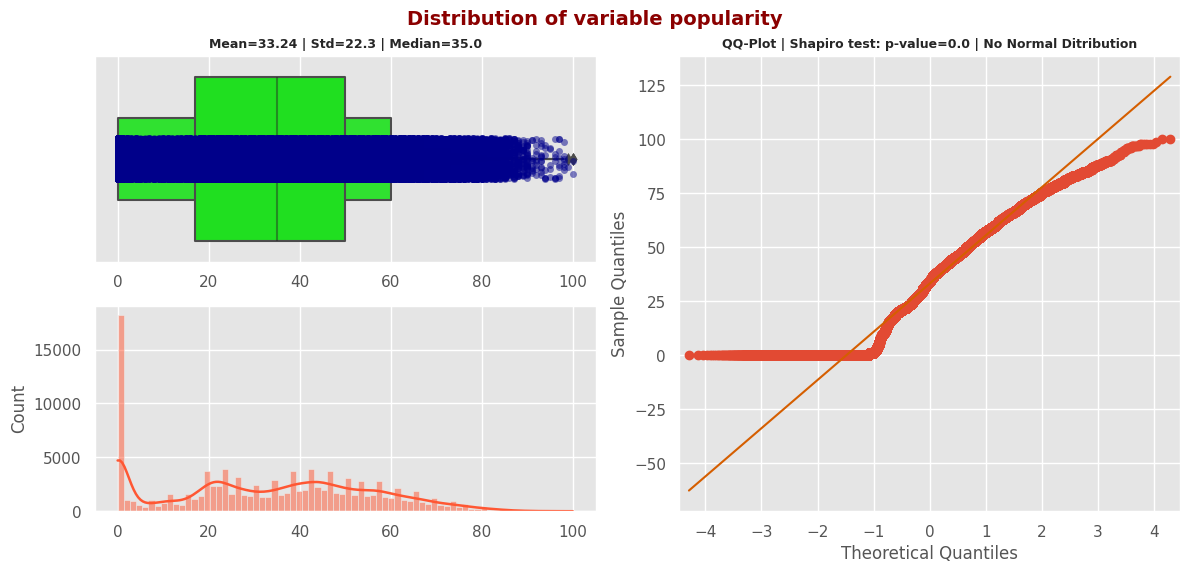

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



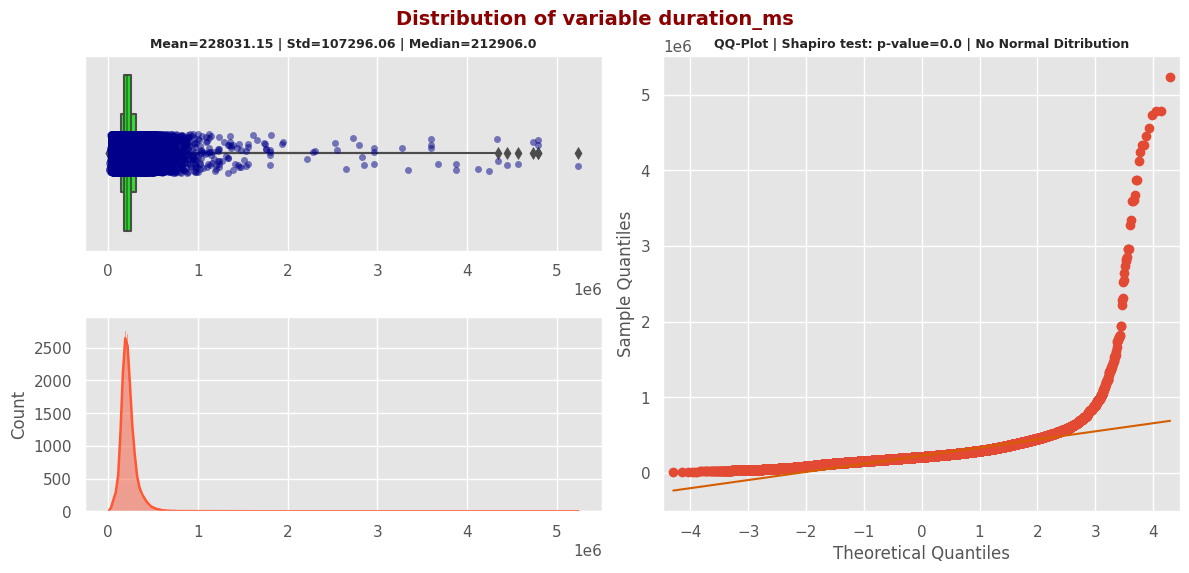

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



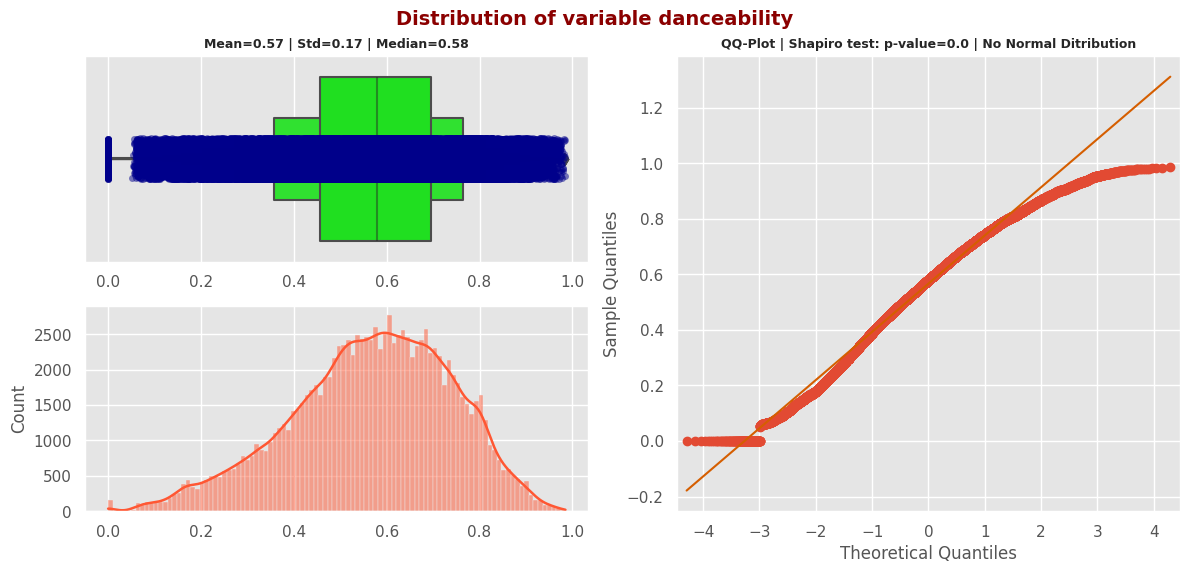

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



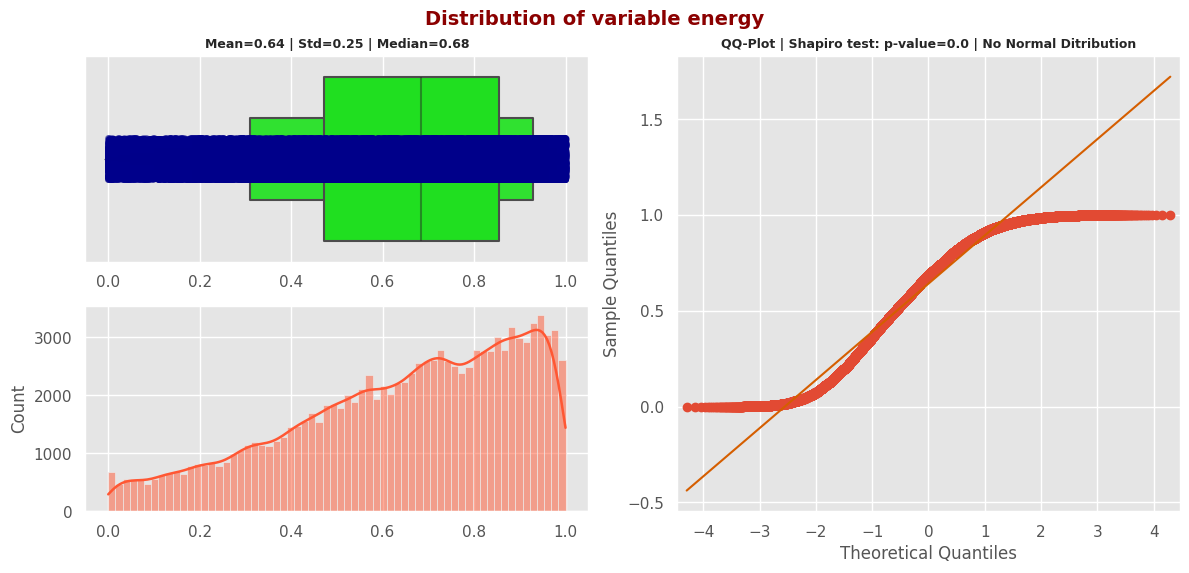

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



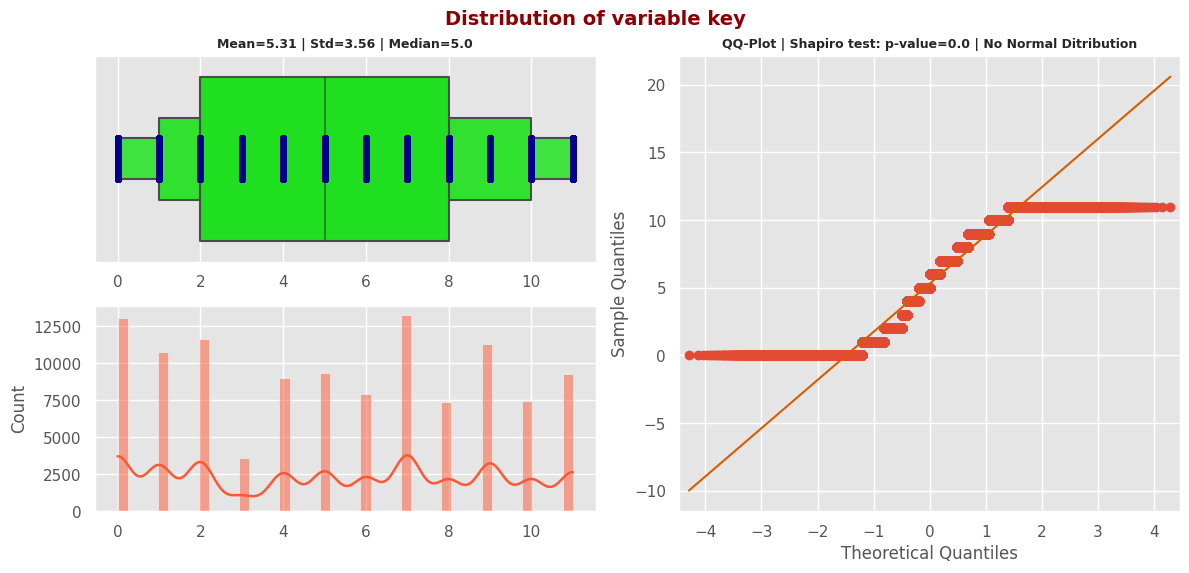

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



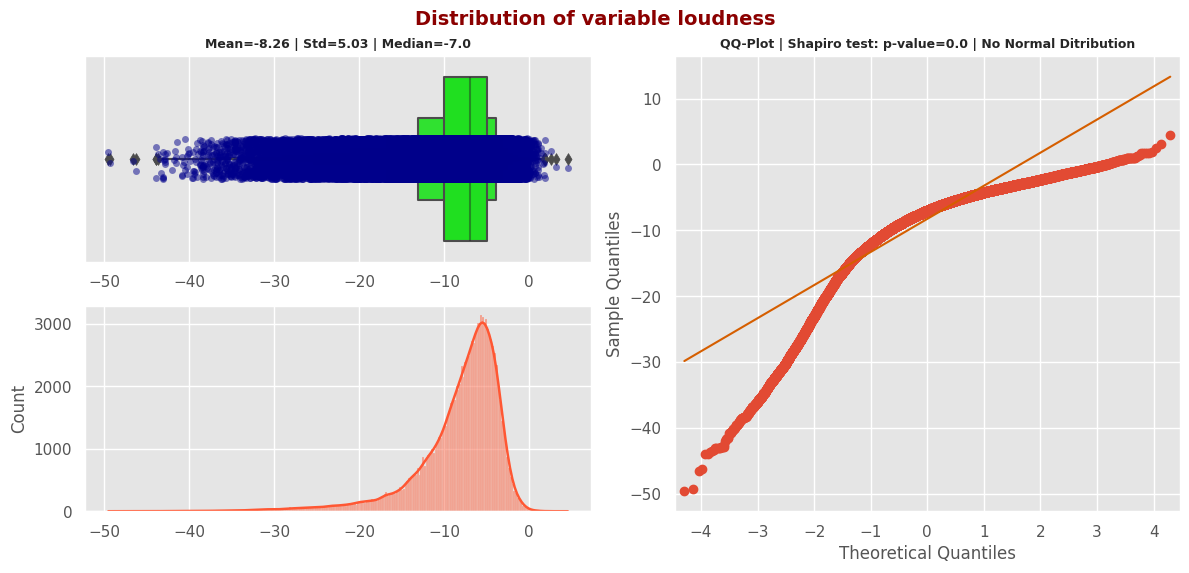

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



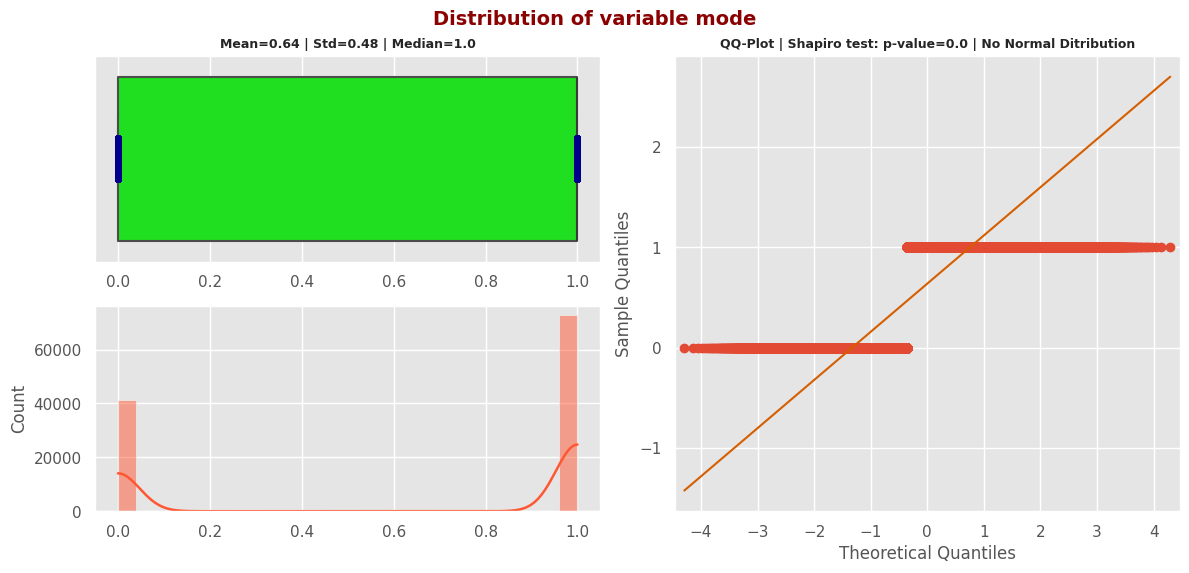

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



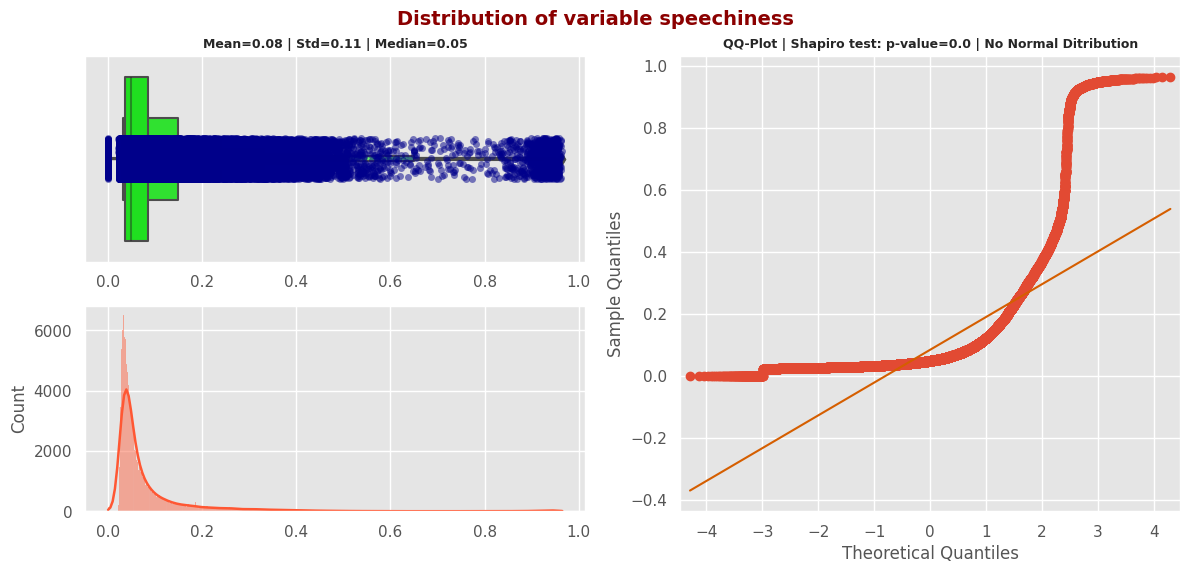

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



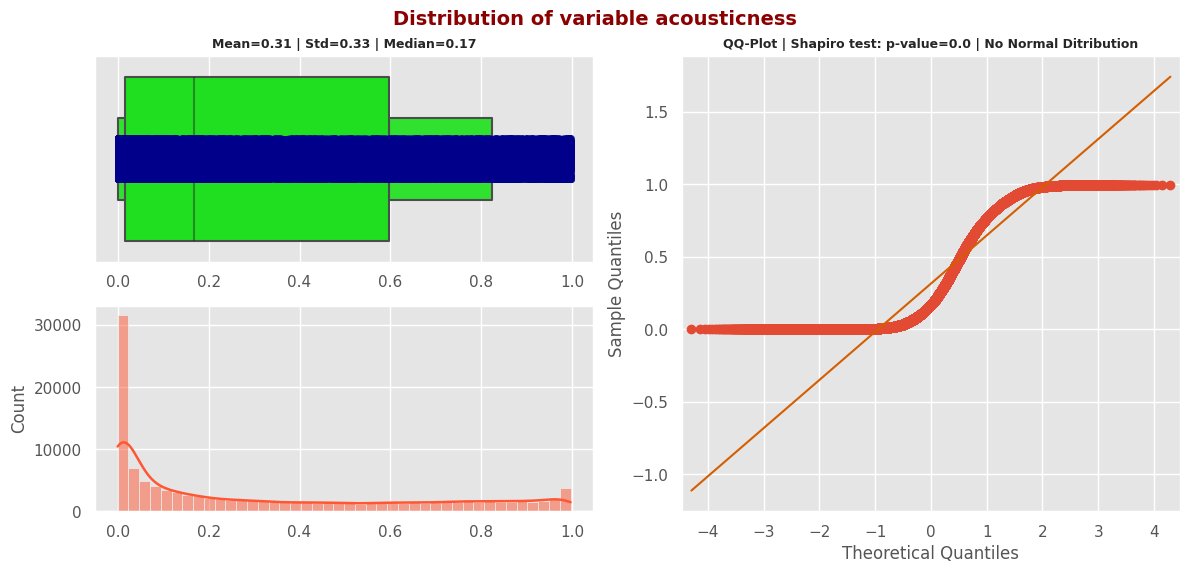

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



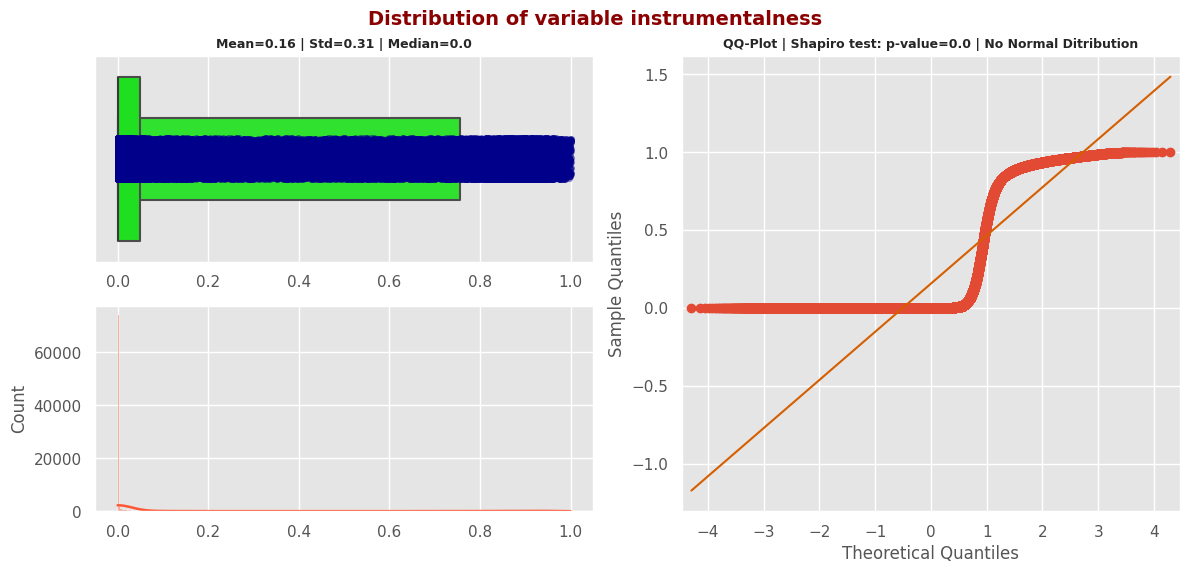

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



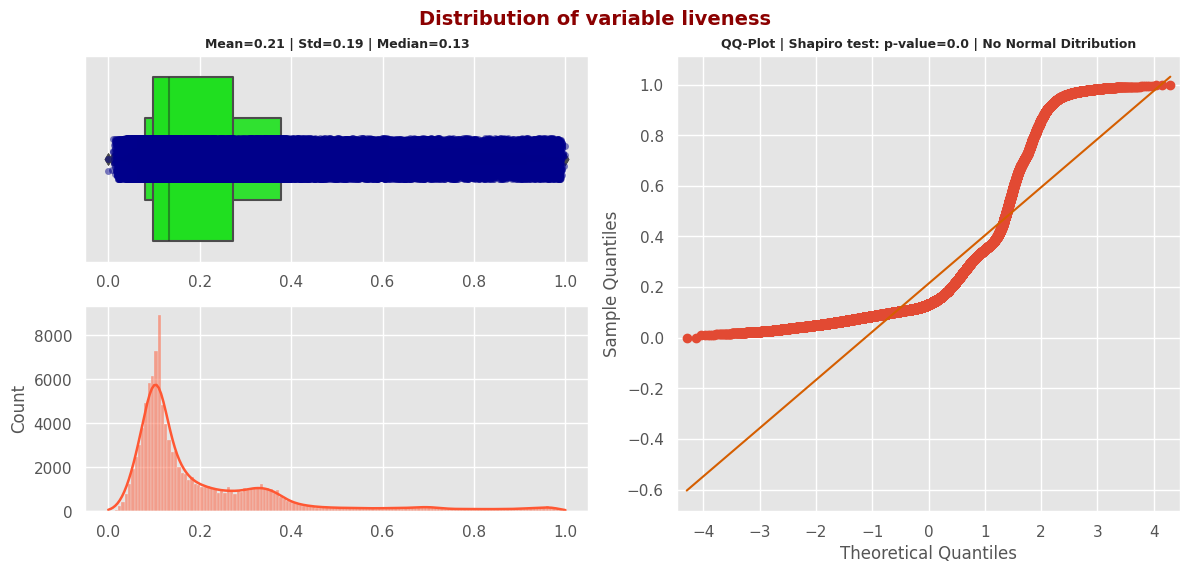

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



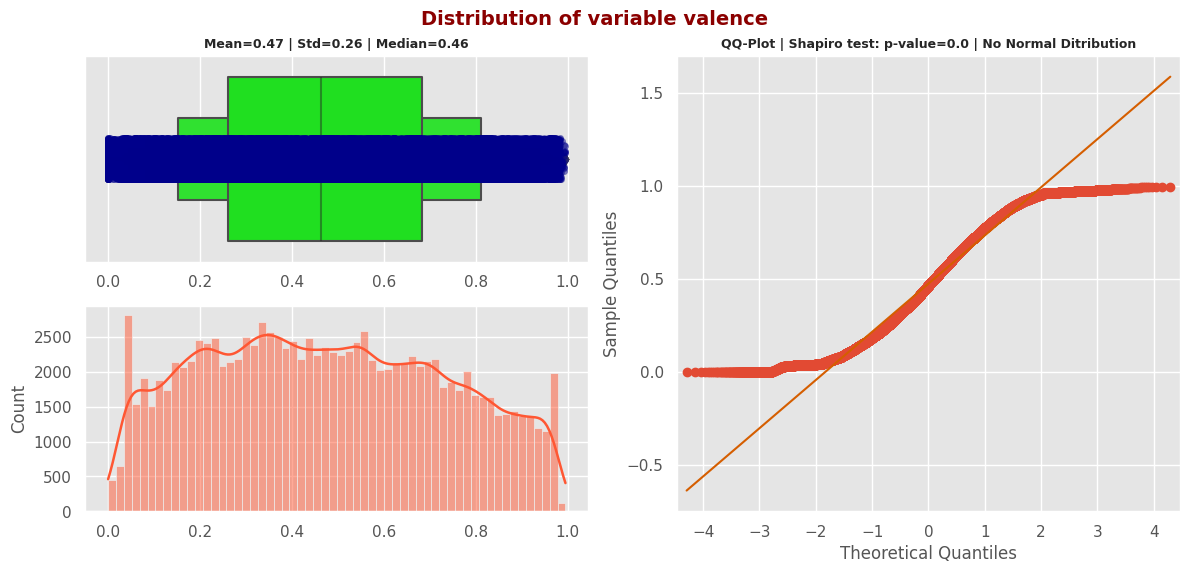

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



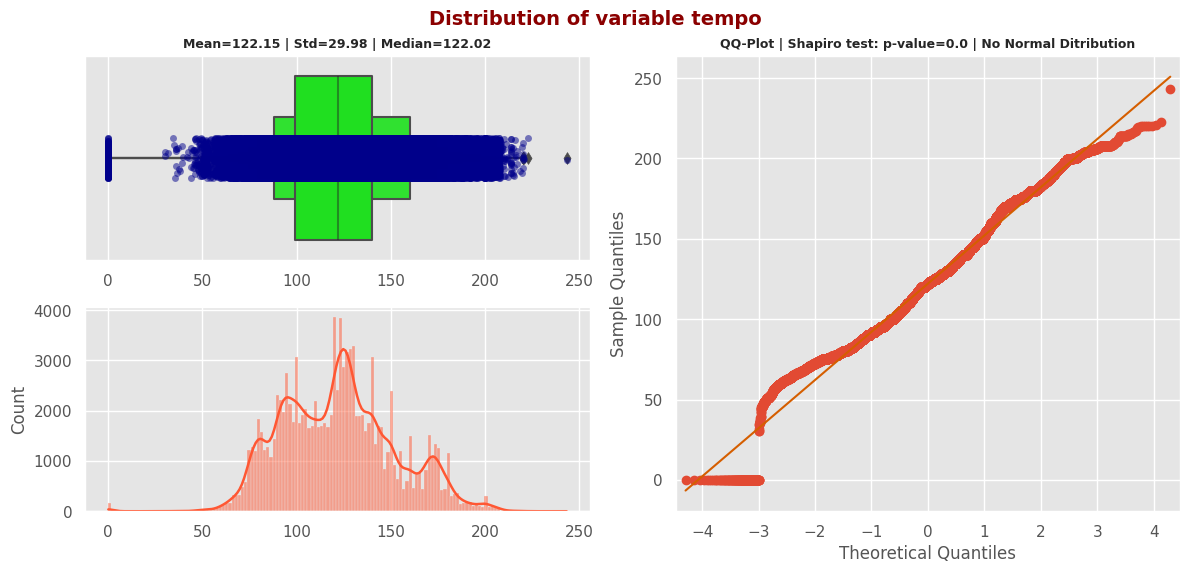

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



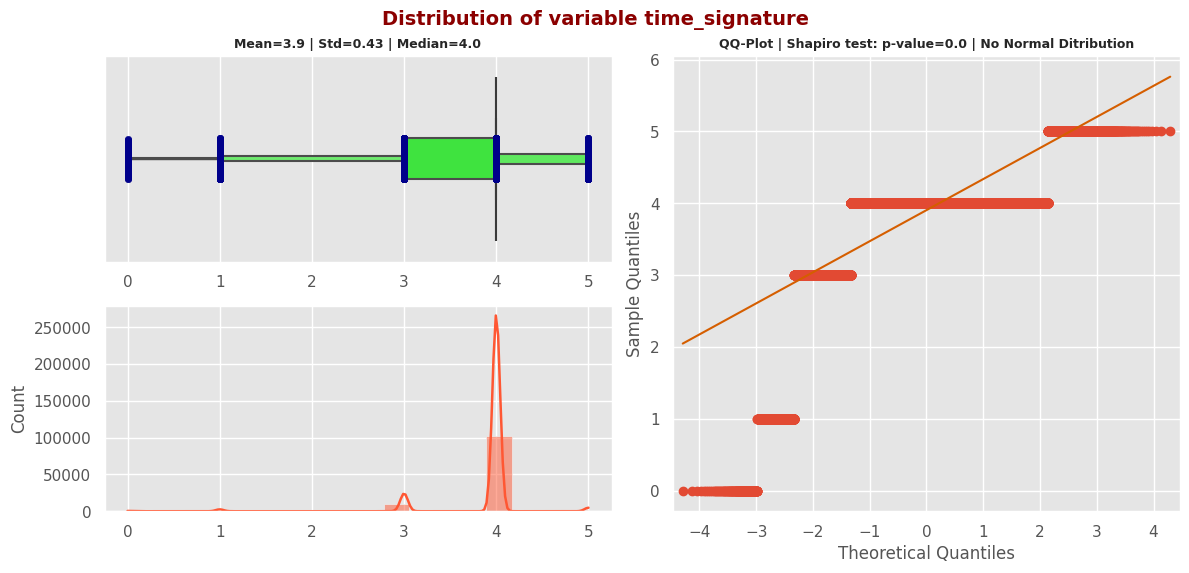

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



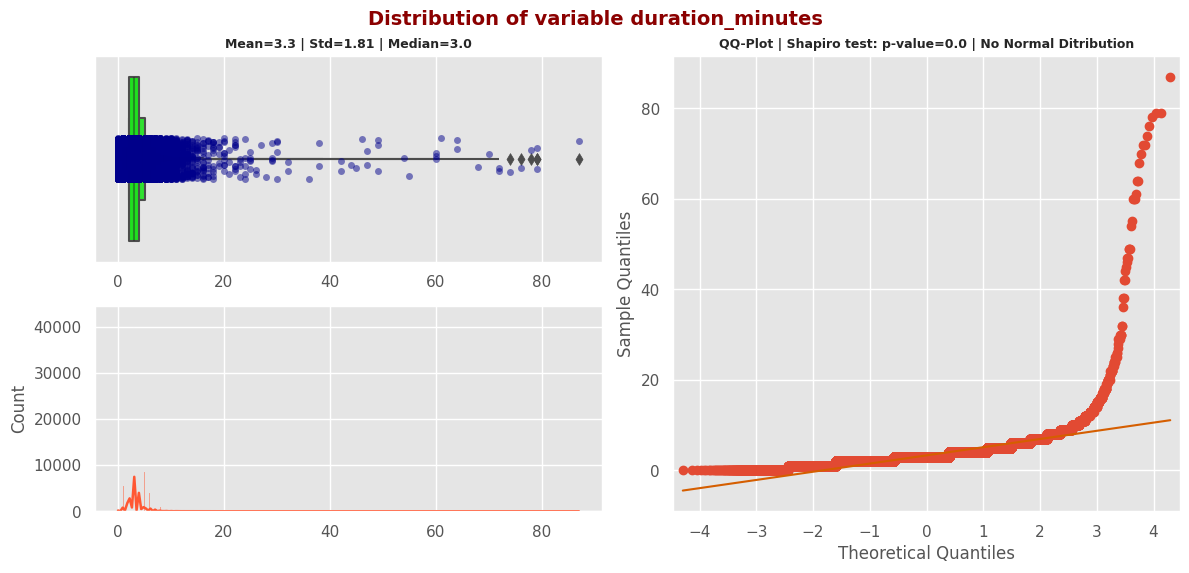

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



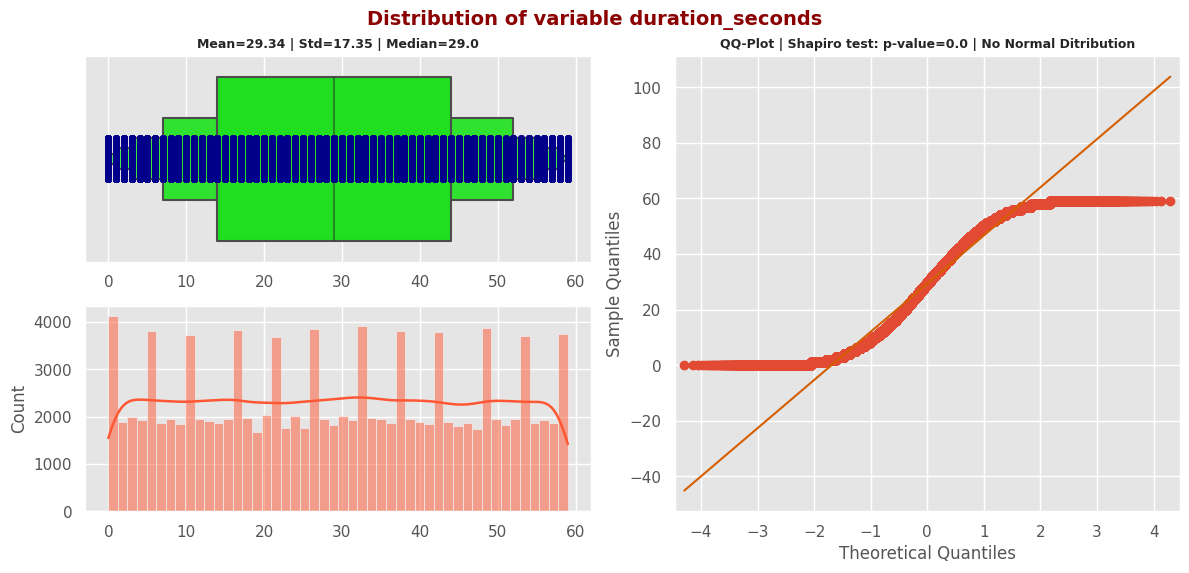

In [24]:
%matplotlib inline
for var in numerical_cols_to_plot:
    univariate_numerical_plot(df, var)

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



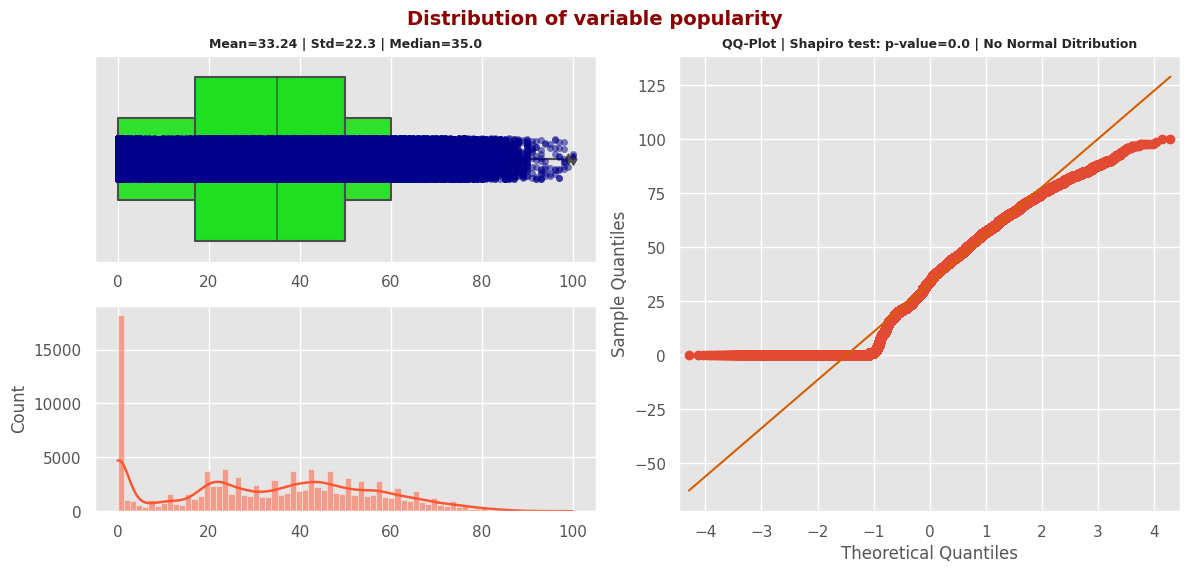

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
univariate_numerical_plot(df, numerical_cols_to_plot[0])